# UMAP vs HDBSCAN

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
sns.set(context='notebook', rc={'figure.figsize':(12,10)})
import umap
import hdbscan
from sklearn.metrics import adjusted_rand_score

In [5]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [7]:
data_x = digits.data
data_y = digits.target

In [8]:
print(data_x)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [9]:
print(data_y)

[0 1 2 ... 8 9 8]


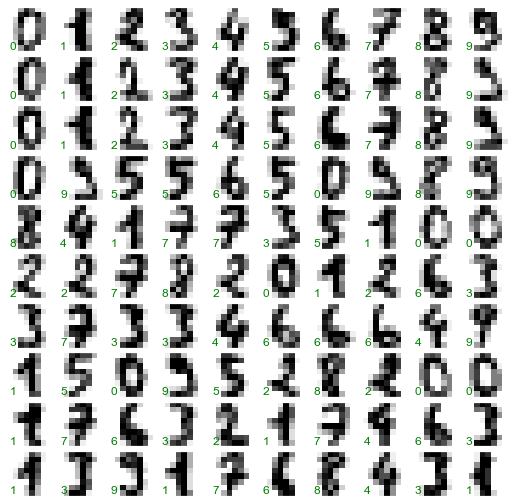

In [10]:
fig, ax = plt.subplots(10,10, figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,axes in enumerate(ax.flat):
    axes.imshow(digits.images[i], cmap='binary')
    axes.text(0.05,0.05, str(digits.target[i]), transform=axes.transAxes, color='green')

In [15]:
start =  datetime.datetime.now()
standard_embedding=umap.UMAP(random_state=42).fit_transform(data_x)
end = datetime.datetime.now()
timetaken = end - start
print(timetaken)

0:00:11.737812


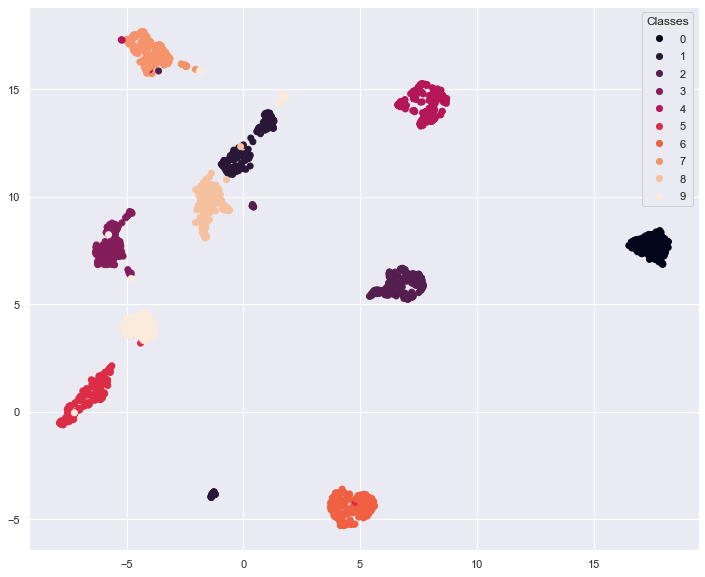

In [24]:
fig, ax = plt.subplots()

scatter = ax.scatter(standard_embedding[:,0], standard_embedding[:,1], c=data_y, )
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
ax.add_artist(legend1)

In [27]:
hdbscan_labels = hdbscan.HDBSCAN().fit_predict(data_x)

In [28]:
hdbscan_labels

array([ 2, 19, -1, ..., -1, -1, -1])

In [30]:
clustered=(hdbscan_labels >= 0)
print(clustered)

[ True  True False ... False False False]


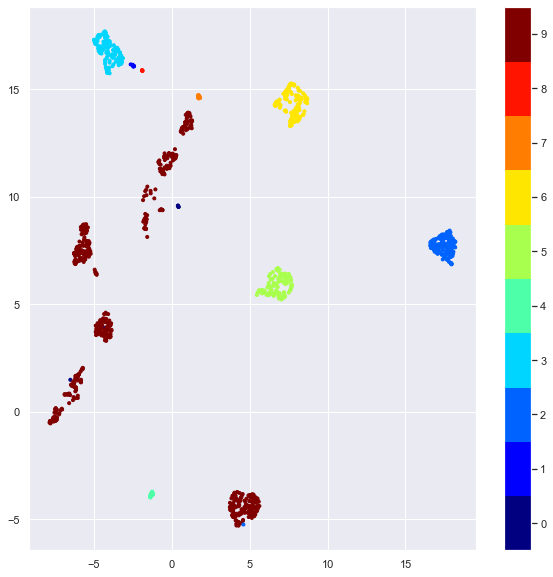

In [32]:
plt.figure(figsize=(10,10))
vis_x = standard_embedding[clustered,0]
vis_y = standard_embedding[clustered,1]
plt.scatter(vis_x, vis_y, c=hdbscan_labels[clustered], cmap=plt.cm.get_cmap('jet', 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [33]:
clustered=(hdbscan_labels >= 0)
(adjusted_rand_score(data_y[clustered], hdbscan_labels[clustered]))

0.9040845016096042

In [34]:
(adjusted_rand_score(data_y, hdbscan_labels))

0.4869574965473278